In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 


## Poverty Rate


In [3]:
#pull full data from csv
fulldata = pd.read_csv("fulldata_with_type.csv")
fulldata.head()

,Unnamed: 0.1,Unnamed: 0,Institution Name,City,State,Zip Code,zip,Type,Latitude,Longitude,...,Average Cost for Program Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Admission Rate,county,Median Income,Total Count,Below Poverty,Above Poverty,Poverty Rate
0,0,0,Abilene Christian University,Abilene,TX,79699,79699,Private for Profit,32.468943,-99.709797,...,NaN,40500.0,40500.0,0.6579,Taylor,61806,136790,19947,116843,14.582206
1,1,1,Alvin Community College,Alvin,TX,77511-4898,77511,Public,29.396244,-95.240671,...,NaN,1706.0,4010.0,NaN,Brazoria,91972,362047,27271,334776,7.532447
2,2,2,Amarillo College,Amarillo,TX,79109,79109,Public,35.187839,-101.846988,...,NaN,2136.0,4704.0,NaN,Randall,78038,138573,13072,125501,9.433295
3,3,3,Amberton University,Garland,TX,75041-5595,75041,Private for Profit,32.859931,-96.653020,...,NaN,NaN,NaN,NaN,Dallas,70732,2573799,359882,2213917,13.982522
4,4,4,Angelina College,Lufkin,TX,75902-1768,75902,Public,31.287444,-94.731625,...,NaN,3120.0,6150.0,NaN,Angelina,57055,84075,13536,70539,16.099911


In [5]:
#Dataframe to pull relevant data, Average Cost for Academic Year, Tutition in-State, Tution Out of State, Poverty Rate
poverty = fulldata[["Average Cost for Academic Year Institution","Tuition Fee for In-District Students", "Tuition Fee for Out-of-State Students", "Poverty Rate" ]]
poverty.head()


,Average Cost for Academic Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Poverty Rate
0,55221.0,40500.0,40500.0,14.582206
1,11551.0,1706.0,4010.0,7.532447
2,10912.0,2136.0,4704.0,9.433295
3,NaN,NaN,NaN,13.982522
4,13973.0,3120.0,6150.0,16.099911


In [6]:
#Drop null values
poverty = poverty.dropna()
poverty.head()

,Average Cost for Academic Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Poverty Rate
0,55221.0,40500.0,40500.0,14.582206
1,11551.0,1706.0,4010.0,7.532447
2,10912.0,2136.0,4704.0,9.433295
4,13973.0,3120.0,6150.0,16.099911
5,21174.0,8186.0,17978.0,11.739636


In [8]:
# Define a function to create Linear Regression plots.  This is so that you can just put in x,y values.  Change xlabel and ylabel

def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    print(f'The Correlation Coefficient r = {rvalue}.')
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(0,2), xycoords='figure points', fontsize=15, color="red", annotation_clip=False)
    return

The Correlation Coefficient r = -0.13782400527855668.


Text(0, 0.5, 'Average Cost for Academic Year')

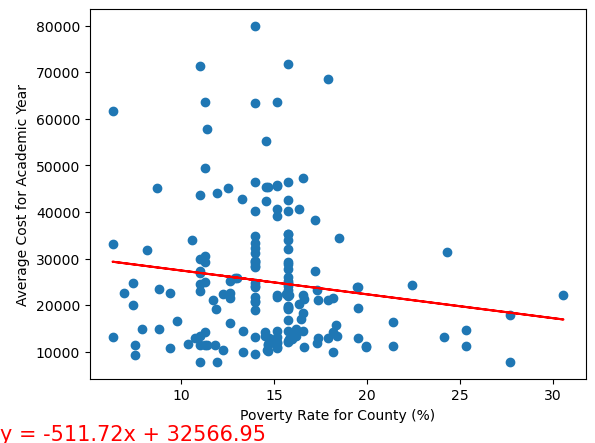

In [9]:
regression(poverty["Poverty Rate"],poverty["Average Cost for Academic Year Institution"])
plt.xlabel("Poverty Rate for County (%)")
plt.ylabel("Average Cost for Academic Year")

The Correlation Coefficient r = -0.12580772728423037.


Text(0, 0.5, 'Average Tuition for In-State Students')

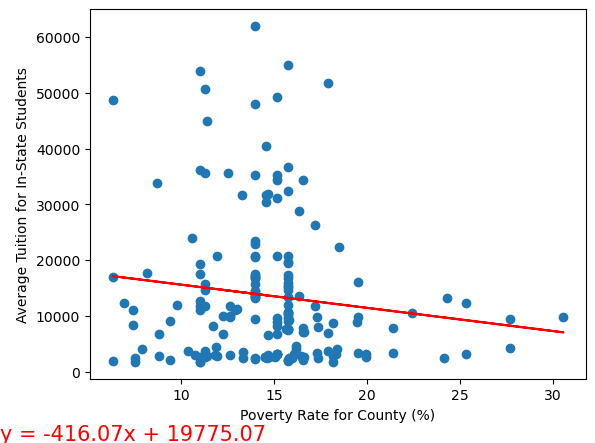

In [12]:
regression(poverty["Poverty Rate"],poverty["Tuition Fee for In-District Students"])
plt.xlabel("Poverty Rate for County (%)")
plt.ylabel("Average Tuition for In-State Students")


The Correlation Coefficient r = -0.042744877093590074.


Text(0, 0.5, 'Average Tuition for Out-State Students')

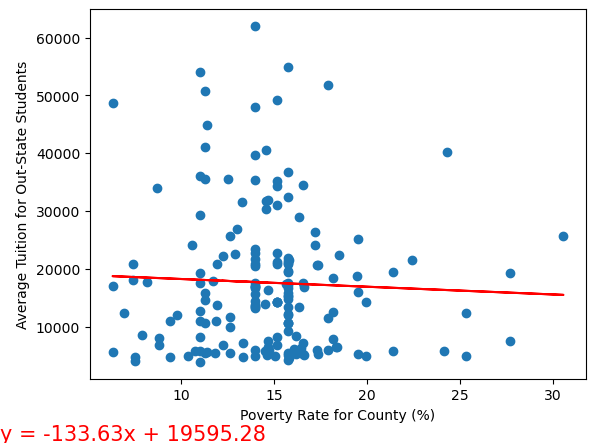

In [13]:
regression(poverty["Poverty Rate"],poverty["Tuition Fee for Out-of-State Students"])
plt.xlabel("Poverty Rate for County (%)")
plt.ylabel("Average Tuition for Out-State Students")


## Median Income

In [14]:
income = fulldata[["Average Cost for Academic Year Institution","Tuition Fee for In-District Students", "Tuition Fee for Out-of-State Students", "Median Income" ]]
income.head()


,Average Cost for Academic Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Median Income
0,55221.0,40500.0,40500.0,61806
1,11551.0,1706.0,4010.0,91972
2,10912.0,2136.0,4704.0,78038
3,NaN,NaN,NaN,70732
4,13973.0,3120.0,6150.0,57055


In [16]:
#Drop null values
#income = income.dropna()
income.head()

,Average Cost for Academic Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Median Income
0,55221.0,40500.0,40500.0,61806
1,11551.0,1706.0,4010.0,91972
2,10912.0,2136.0,4704.0,78038
4,13973.0,3120.0,6150.0,57055
5,21174.0,8186.0,17978.0,67215


The Correlation Coefficient r = 0.16872363148603417.


Text(0, 0.5, 'Average Cost for Academic Year')

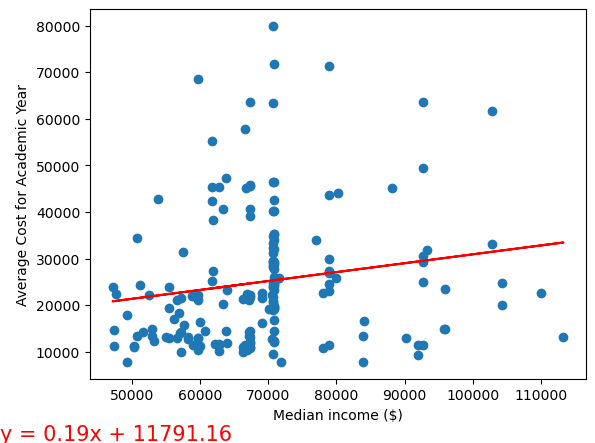

In [17]:
##Just copy and paste from the previous graphs above.
##Change the x,y values to income["Median Income"], income["Average Cost for Academic Year Institution"]
regression(income["Median Income"],income["Average Cost for Academic Year Institution"])
plt.xlabel("Median income ($)")
plt.ylabel("Average Cost for Academic Year")


The Correlation Coefficient r = 0.14634039271538177.


Text(0, 0.5, 'Tuition Fee for In-State Students')

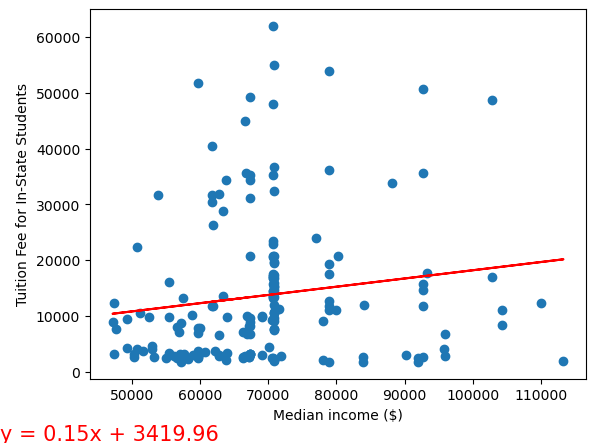

In [18]:
regression(income["Median Income"],income["Tuition Fee for In-District Students"])
plt.xlabel("Median income ($)")
plt.ylabel("Tuition Fee for In-State Students")


The Correlation Coefficient r = 0.11509235286603249.


Text(0, 0.5, 'Tuition Fee for Out-of-State Students')

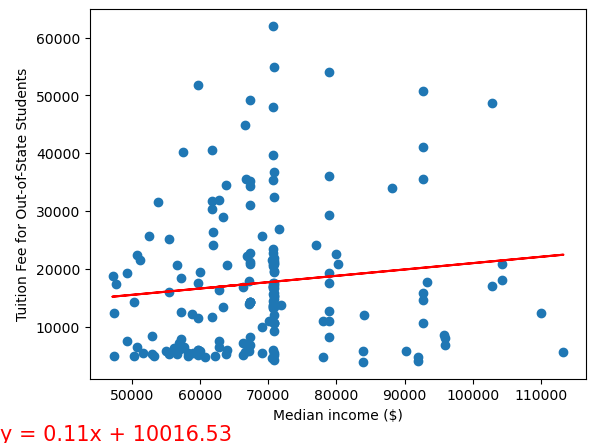

In [20]:
regression(income["Median Income"],income["Tuition Fee for Out-of-State Students"])
plt.xlabel("Median income ($)")
plt.ylabel("Tuition Fee for Out-of-State Students")